# Zillow 2017

## Package Imports <a class="anchor" id="packages_import"></a>

In [1]:
from final_zillow_functions import (find_model_scores, scale_zillow, find_baseline,
                                    train_val_test, explore_num_features,
                                    explore_bathrooms, explore_bedrooms, explore_sqft,
                                    explore_relationships, check_p_val, train_validate,
                                    wrangle_zillow, q1_stats_test, q2_stats_test,
                                    q3_stats_test, q4_stats_test, final_test,
                                    explore_value_loc, explore_counties)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Acquire<a class="anchor" id="data_import"></a>

* Data came from Codeup's SQL server who acquired it from a Kaggle challenge.
* Began with 52441 observations and 4 features.

* Acquired on 1/19/2023
* Observation = single family house sold in 2017.
* Column = feature of the house that was sold.

## Prepare <a class="anchor" id="prepare"></a>

* Finished with: 50185 observations and 15 features.
* Dropped 2256 observations due to null or outlier values.
* Outliers are greater than the .99 quantile.

In [2]:
#Get the data from the SQL server and do a bit of cleaning
df = wrangle_zillow()
len(df)

50185

## Explore process <a class="anchor" id="explore1"></a>

* All statistics test used a 95% significance level (alpha = 0.05)
* Spearman's R was used due to distributions being right skewed.

In [3]:
#Splits data
train, val, test = train_validate(df)

### Question 1 <a class="anchor" id="q_1"></a>

#### Is there a relationship between a house's square footage and it's value?

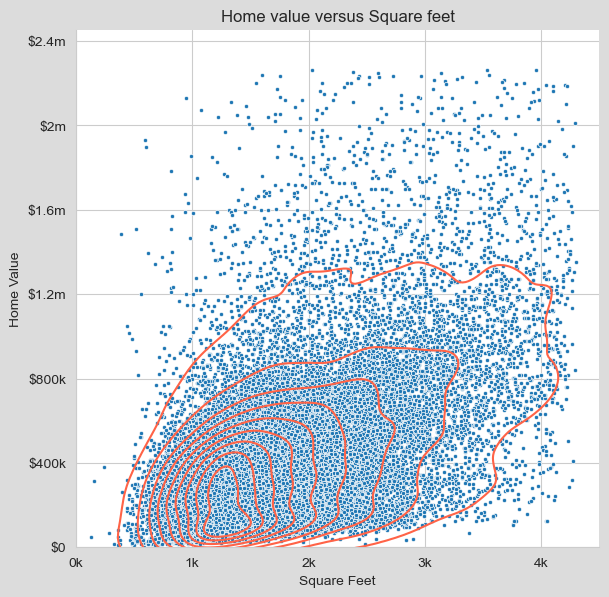

In [4]:
explore_sqft(train)

#### Q1 Statistical Test <a class="anchor" id="q_1_stats"></a>

- H0: Square feet and tax value are independent variables.
- HA: Square feet and tax value have a relationship.

In [5]:
q1_stats_test(train)

We have evidence to reject the null hypothesis.
Square feet and tax value have a relationship.


### Question 2 <a class="anchor" id="q_2"></a>

#### Does the number of bedrooms affect the value of a house?

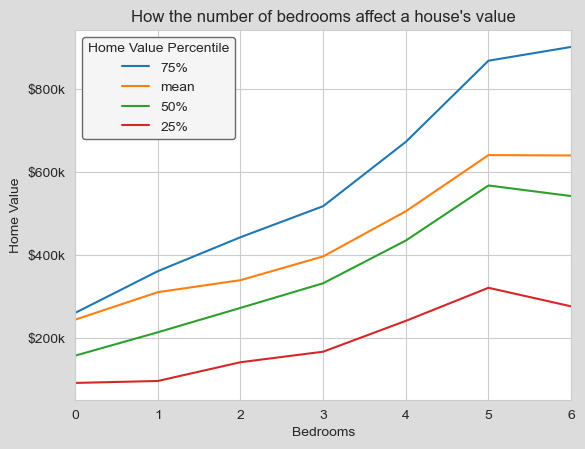

In [6]:
explore_bedrooms(train)

#### Q2 Statistical Test <a class="anchor" id="q_2_stats"></a>

- H0: Bedroom count and tax value are independent variables.
- HA: Bedroom count and tax value have a relationship.

In [7]:
q2_stats_test(train)

We have evidence to reject the null hypothesis.
Bedrooms feet and tax value have a relationship.


### Question 3 <a class="anchor" id="q_3"></a>

#### Does the number of bathrooms affect the value of a house?

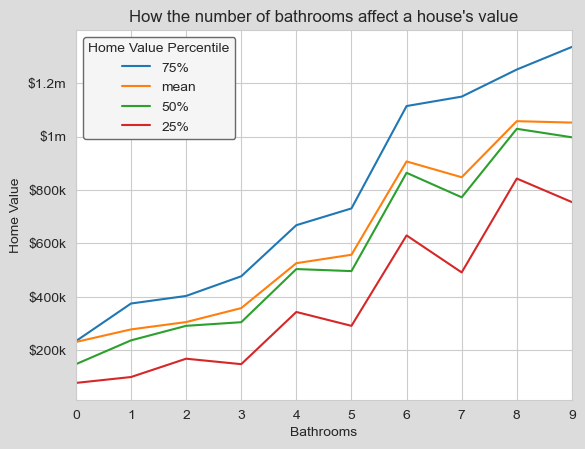

In [8]:
explore_bathrooms(train)

#### Q3 Statistical Test <a class="anchor" id="q_3_stats"></a>

- H0: Bathroom count and tax value are independent variables.
- HA: Bathroom count and tax value have a relationship.

In [9]:
q3_stats_test(train)

We have evidence to reject the null hypothesis.
Number of bathrooms and home value have a relationship.


### Question 4 <a class="anchor" id="q_4"></a>

#### Does the number of features affect the value of a home?

Features:
- Pool
- Spa/Hot tub
- Deck
- Garage

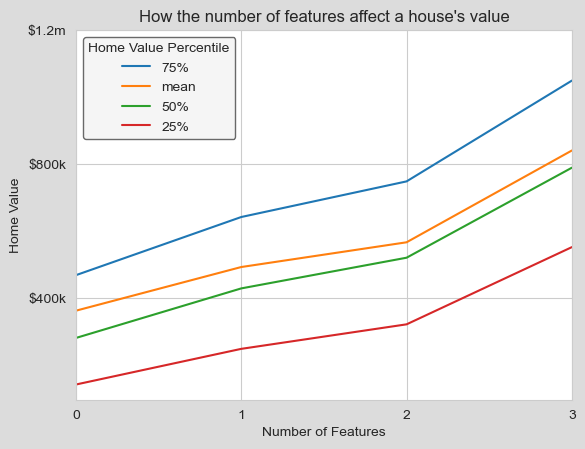

In [10]:
explore_num_features(train)

#### Q4 Statistical Test <a class="anchor" id="q_4_stats"></a>

- H0: Feature count and tax value are independent variables.
- HA: Feature count and tax value have a relationship.

In [11]:
q4_stats_test(train)

We have evidence to reject the null hypothesis.
Number of features and home value have a relationship.


## Explore summary <a class="anchor" id="explore2"></a>

## Modeling <a class="anchor" id="modeling"></a>

RMSE baseline: 349,233
**********************************
        Model  RMSE on Train  RMSE on Validate  Difference
0  OLS Linear       280467.0          280286.0       181.0
1  Lasso Lars       280470.0          280280.0       190.0
2     Tweedie       284495.0          281784.0      2711.0
3  Polynomial       280467.0          280288.0       179.0


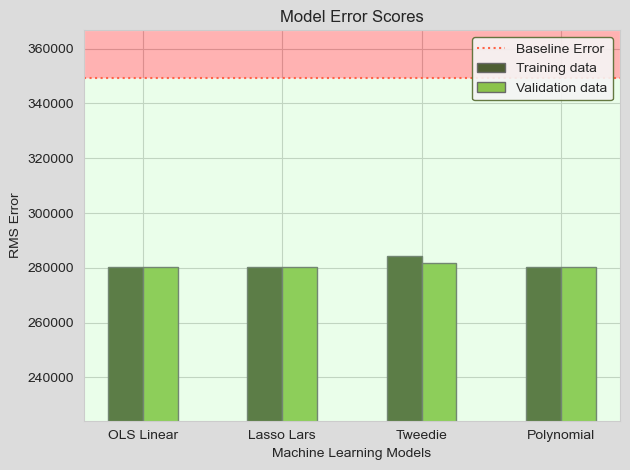

In [12]:
find_model_scores(df)

### Lasso Lars scored the best on the validate set

RMSE baseline: 349,233
**********************************
        Model  RMSE on Train  RMSE on Validate  RMSE on Test
0  Lasso Lars       280470.0          280280.0      286891.0


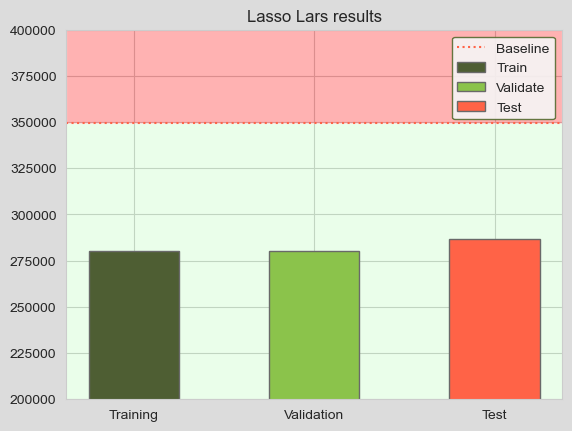

<Figure size 400x400 with 0 Axes>

In [13]:
final_test(df)

## Conclusion <a class="anchor" id="conclusion"></a>

### Summery <a class="anchor" id="c_summery"></a>

### Recommendations <a class="anchor" id="c_recs"></a>

- Zillow makes $6 billion of their $8 billion in annual income from selling houses. Lets target home sales.
- Create a Zillow Pages of locally available resources to improve properties.
- Targeted advertising during the fall and winter.
"If you are planning to sell, improve your property now."
- Target areas with higher property values. Less affected by high interest rates because they have available funds.
- Aligns Zillow's and home owners incentives of selling quickly and for a higher amount.

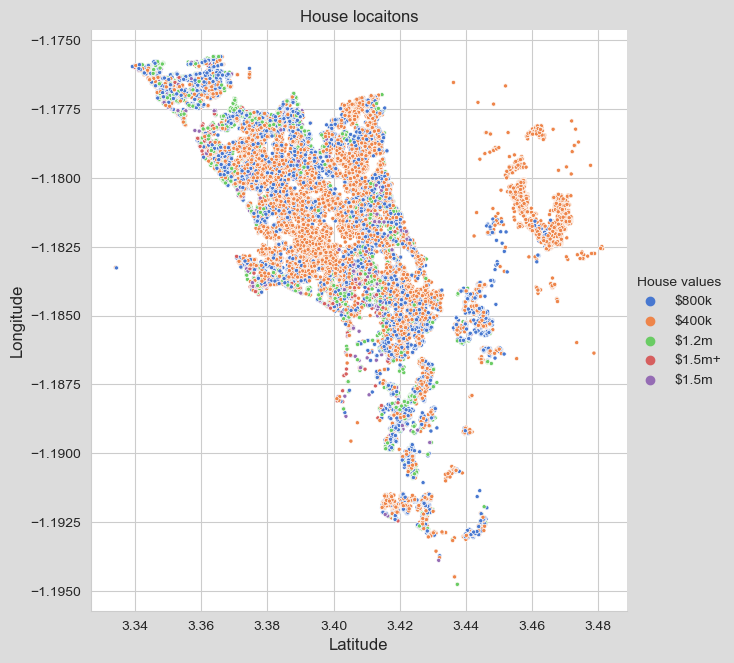

In [14]:
explore_value_loc(train)

### Next Steps <a class="anchor" id="c_steps"></a>

- Explore location based modeling
- Time series analysis on when sales occure
- A function to automatically map fips to county and state

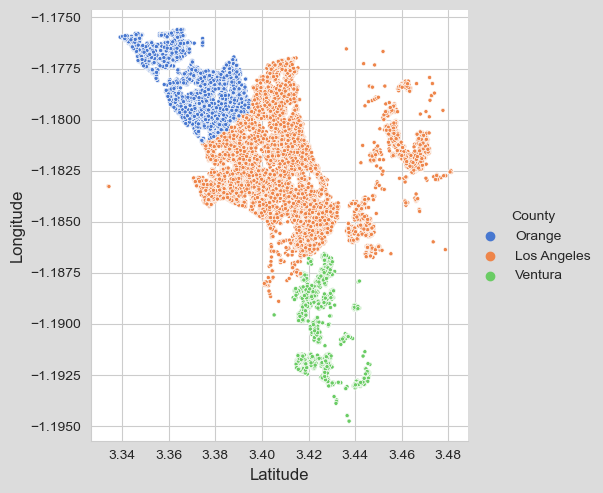

In [15]:
explore_counties(train)